In [1]:
!pip3 install sympy
%matplotlib notebook 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as anim
from tqdm import tqdm 
import sympy 
from fractions import Fraction

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


# ECUACIÓN DIFERENCIAL NO ORDINARIA

Resolver análiticamente la solución diferencial no ordinaria


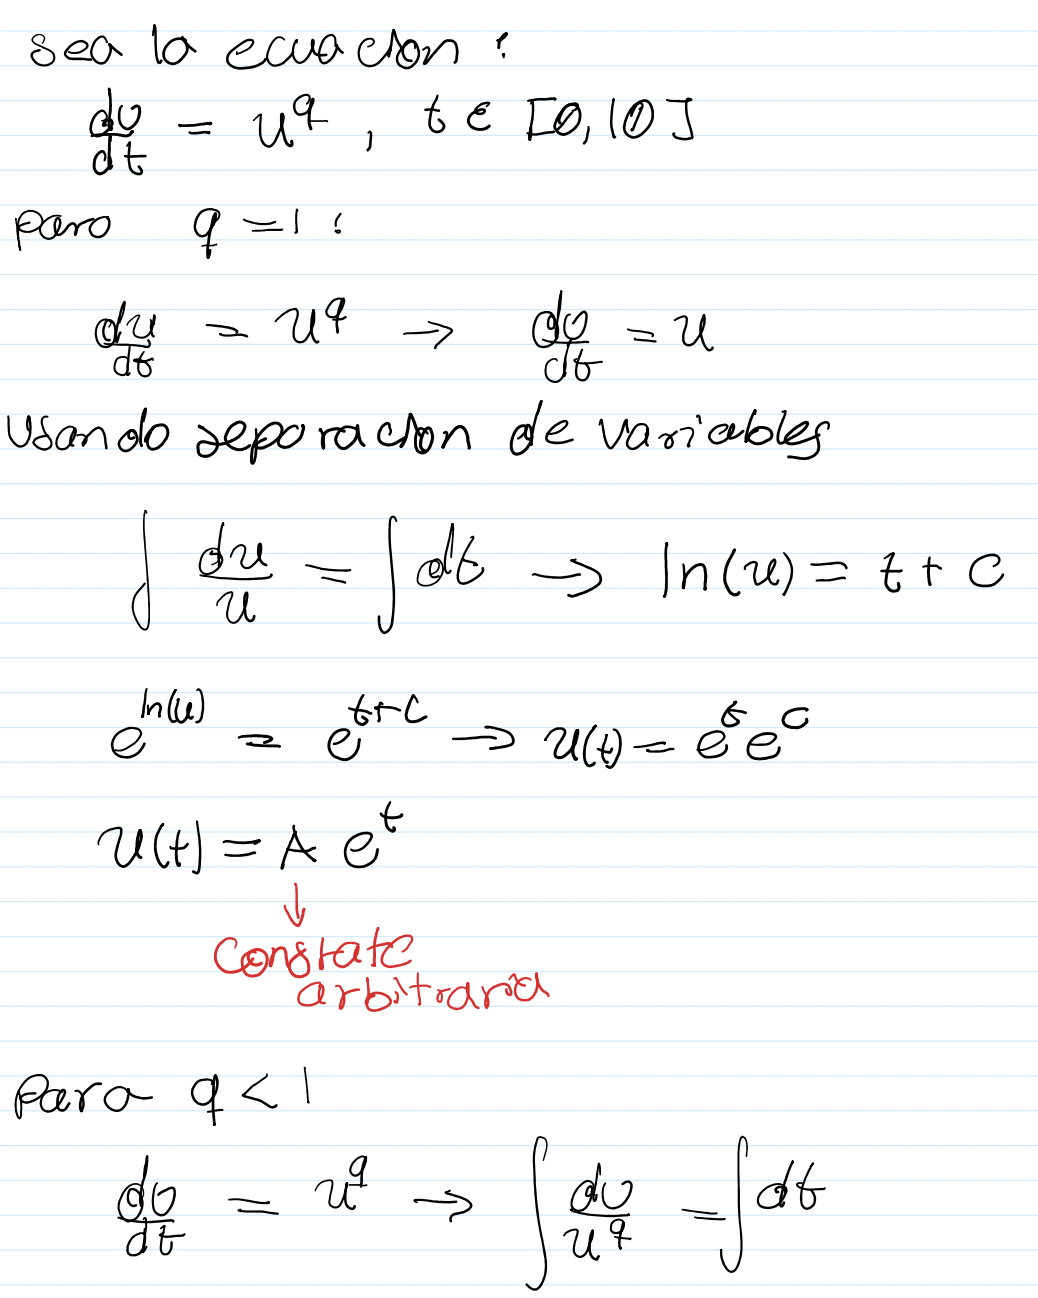


# 

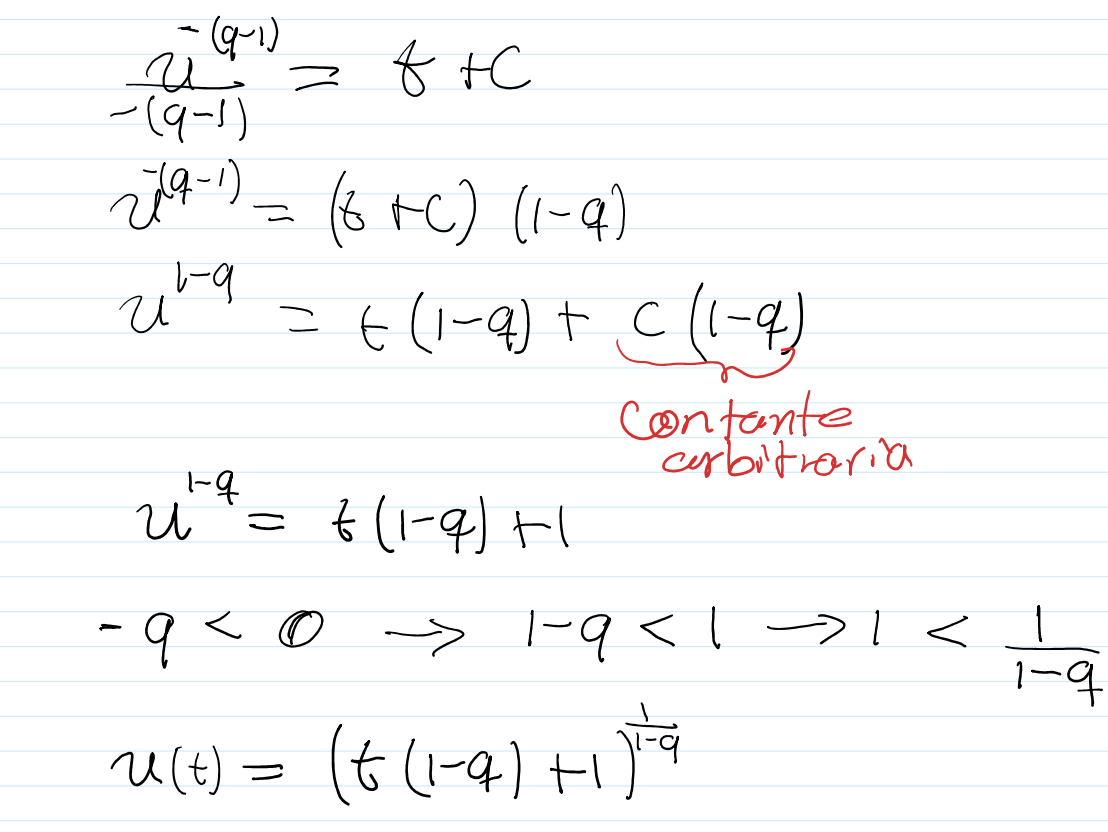

In [2]:
N = 100
t = np.linspace(0.,10.,N)

h=(t[-1]-t[0])/len(t)
Q=[0.,0.2,0.4,0.7,0.9,1.]

In [3]:
def du(x,q):
    return x**q

In [4]:
X=[]
for q in Q:
    x=np.zeros(len(t))
    for i in range(1, len(t)):
        k1 = du(t[i-1],q)

        k2 = du(t[i-1]+(1/2*k1),q)

        k3 = du(t[i-1]+(1/2*k2),q)

        k4 = du(t[i-1]+k3,q)

        x[i] = x[i-1] + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
    X.append(x)


<IPython.core.display.Javascript object>


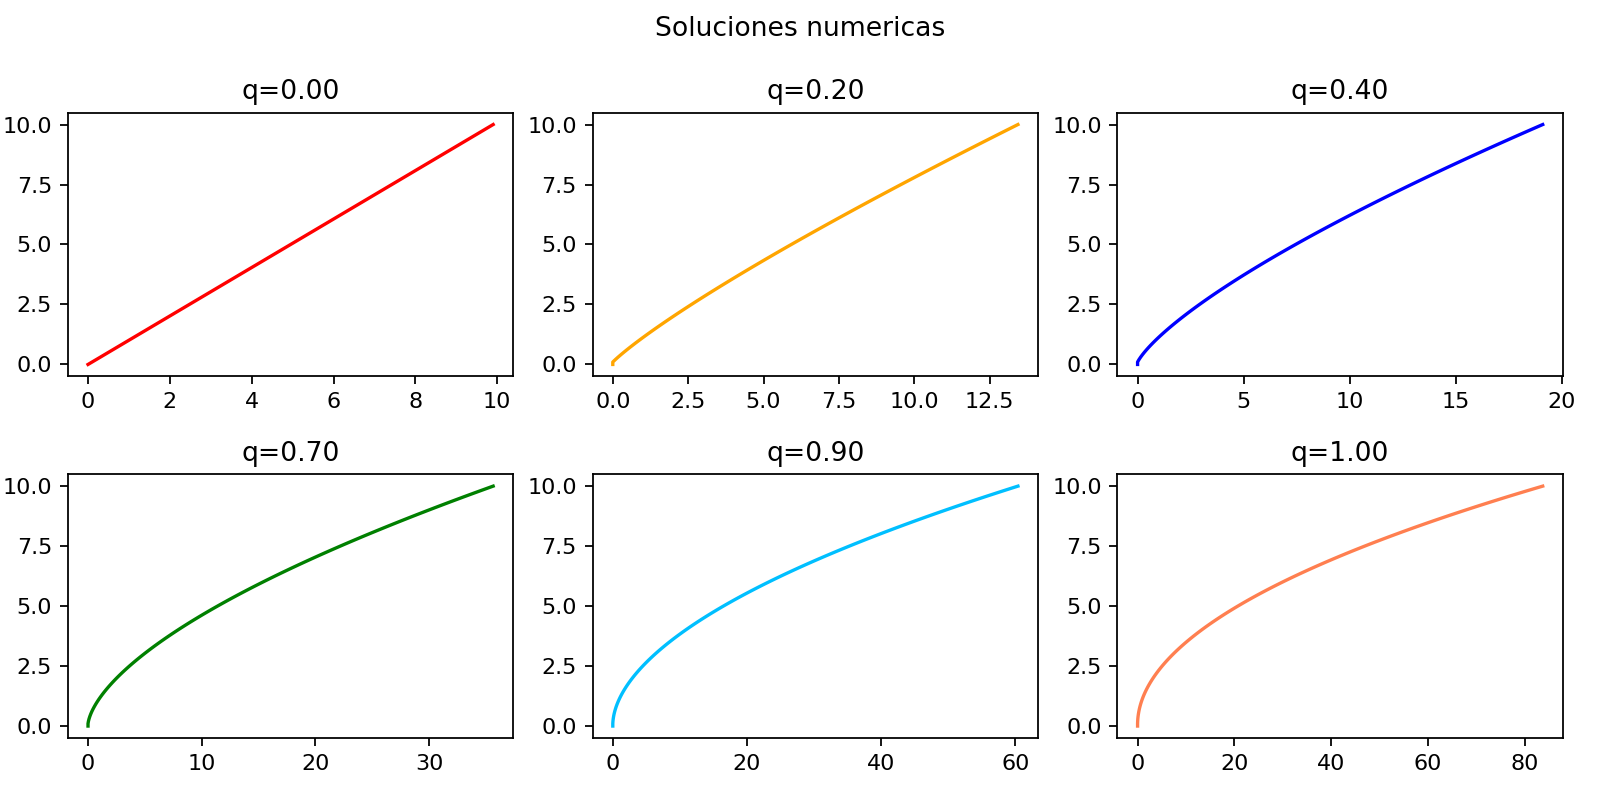

In [5]:
fu,histogramas= plt.subplots(2,3)  
fu.suptitle('Soluciones numericas')
fu.set_figheight(5)
fu.set_figwidth(10)
Color=['Red','Orange','Blue','Green','deepskyblue','coral']
k=0
for i in range(2):
    for j in range(3):
        histogramas[i,j].plot(X[k],t, color=Color[k])
        histogramas[i,j].set_title('q={:.2f}'.format(Q[k]))
        k+=1
fu.tight_layout()

# METODOS MULTIPASOS

Encontrar los coeficientes para diferentes metodos de solución numerica multipaso

In [6]:
t = sympy.Symbol("t", Real = True)
u = sympy.Symbol("u", Real = True)


In [7]:
def coeficientes_AB(s):
    coeficientes_multipasos = np.zeros(s)
    for j in range((s)):
        primer_termino = ((-1)**j)/(np.math.factorial(j)*np.math.factorial(s-j-1))
        productoria = 1
        for i in range(s):
            if i != j:
                productoria = productoria*(u+i)
        integral = sympy.integrate(productoria, (u,0,1))
        coeficiente = primer_termino*integral
        coeficientes_multipasos[j] = (coeficiente)
    return coeficientes_multipasos 

In [8]:
print(f"Los coeficientes para el metodo de Adams-Brashford para 3 puntos son: {coeficientes_AB(3)}")

Los coeficientes para el metodo de Adams-Brashford para 3 puntos son: [ 1.91666667 -1.33333333  0.41666667]


In [9]:
print(f"Los coeficientes para el metodo de Adams-Brashford para 4 pasos son:{coeficientes_AB(4)}")

Los coeficientes para el metodo de Adams-Brashford para 4 pasos son:[ 2.29166667 -2.45833333  1.54166667 -0.375     ]


In [10]:
def coeficientes_AM(s):
    coeficientes_multipasos = np.zeros(s+1)
    for j in range((s+1)):
        primer_termino = ((-1)**j)/(np.math.factorial(j)*np.math.factorial(s-j))
        productoria2 = 1
        for i in range(s+1):
            if i != j:
                productoria2 = productoria2*(u+(i-1))
        integral = sympy.integrate(productoria2, (u,0,1))
        coeficiente = primer_termino*integral
        coeficientes_multipasos[j] = (coeficiente)
    return coeficientes_multipasos 

In [11]:
print(f"Los coeficientes para el metodo de Adams-Brashford para 3 puntos son en representacion decimal son:                       {coeficientes_AM(3)}")

Los coeficientes para el metodo de Adams-Brashford para 3 puntos son en representacion decimal son:                       [ 0.375       0.79166667 -0.20833333  0.04166667]


In [12]:
print(f"Los coeficientes para el metodo de Adams-Brashford para 4 puntos en representacion decimal son:                        {coeficientes_AM(4)}")

Los coeficientes para el metodo de Adams-Brashford para 4 puntos en representacion decimal son:                        [ 0.34861111  0.89722222 -0.36666667  0.14722222 -0.02638889]


# INTERACCIÓN N CUERPOS GRAVITACIONALES

In [13]:
pi=np.pi
N=100
G=4*pow(pi,2)
mi=0.01
Ri=1.
v0=0.
h=0.001
t=np.arange(0,2,h)

In [14]:
class Particle():
    
    # init
    def __init__(self, r0,v0,a0,t,m,radius,Id):
        self.dt  = t[1] - t[0]
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.rVector = np.zeros( (len(t),len(r0)) )
        self.vVector = np.zeros( (len(t),len(v0)) )
        self.aVector = np.zeros( (len(t),len(a0)) )
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
    # Method
    def Evolution(self,i): 
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
        self.SetAceleration(i,self.a)
    
        # Euler method
        self.r += self.dt * self.v
        self.v += self.dt * self.a
            
                
    def ReduceSizevelocity(self,factor):
        self.RvVector = np.array([self.vVector[0]]) # initial condition
        for i in range(1,len(self.vVector)):
            if i%factor == 0:
                self.RvVector = np.vstack([self.RvVector,self.vVector[i]])
        
    def ReduceSize(self,factor):
        self.RrVector = np.array([self.rVector[0]]) # initial condition
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])
                
     
    def force(self,particles, e=0.1):
        F=0
        for particle in particles:
            rd = np.linalg.norm(self.r - particle.r)
            f = - (particle.m*rd*G)/(((rd**2)+(e**2))**2/3)
            F+=f
        return F
    
    def aceleration(self,particles):
        F=self.force(particles)
        self.a=F
    
    def interactions(self,P, interes,k = 100):
        for interaccion in range(len(P)):
            if interes != interaccion:    
                condicion = np.linalg.norm(self.r - particle.r)
                condicion2 = self.radius + particle.radius
                if condicion < condicion2:
                    self.a = (k*(condicion**3)*((self.r - particle.r)/(self.radius+particle.radius))/self.m)
        
            
    def energia_del_sistema_k(self, particulas):
        Ek = 0
        for particula in particulas:
            Eo=(1/2)*particula.m*(la.norm(particula.v))**2
            Ek= Eo + Ek
        return Ek
    
    def energia_del_sistema_U(self, particulas, Em=200):
        Eu= Em-  self.energia_del_sistema_k(particulas)
        
        return Eu
    
    # Setters
    def SetPosition(self,i,r):
        self.rVector[i] = r
        
    def SetVelocity(self,i,v):
        self.vVector[i] = v
    def SetAceleration(self, i, a):
        self.aVector[i] = a
        
    # Getters  
    def GetPositionVector(self):
        return self.rVector

    def GetRPositionVector(self):
        return self.RrVector
    
    def GetVelocityVector(self):
        return self.vVector
    
    def GetRVelocityVector(self):
        return self.RvVector
    
    def GetR(self):
        return self.radius
    
    def GetAcelerationVector(self):
        return self.aVector

In [15]:
def GetindividualParticle(position, velocity, aceleration, t):

    x0 = position
    v0 = velocity
    a0 = aceleration
        
    p = Particle(x0,v0,a0,t,1.,2.0,1)
        
    return p

In [16]:
esferas_solidas = []
velocidades_iniciales = np.array([0.,0.,0.])
for i in range(N):
    r= np.random.random()
    theta=np.random.random()*pi
    phi=np.arccos(1-2*np.random.random())
    x=r*np.sin(theta)*np.cos(phi)
    y=r*np.sin(theta)*np.sin(phi)
    z=r*np.cos(theta)
    posiciones_inicial_i=np.array([x,y,z])
    particle = GetindividualParticle(posiciones_inicial_i, velocidades_iniciales, velocidades_iniciales, t)
    esferas_solidas.append(particle)

In [17]:
def RunSimulationP(t,P):
    for it in tqdm(range(len(t))): # Evolucion temporal
        for interes in range(len(P)):
            P[interes].aceleration(P)
            P[interes].Evolution(it)
            P[interes].a = 0
        #Eki=P[0].energia_del_sistema_k(P)
        #EUi=P[0].energia_del_sistema_U(P)
        #Esk[it]=Eki
        #EsU[it]=EUi
    return P

In [18]:
esferas_solidas = RunSimulationP(t,esferas_solidas)

100%|██████████████████████████████████████████| 2000/2000 [02:24<00:00, 13.81it/s]


In [19]:
def ReduceTimeP(t,factor):
    
    for P in esferas_solidas:
        P.ReduceSize(factor)
        P.ReduceSizevelocity(factor)
        
    Newt = []
    
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])        
    return np.array(Newt)

In [20]:
redt = ReduceTimeP(t,1)

<IPython.core.display.Javascript object>


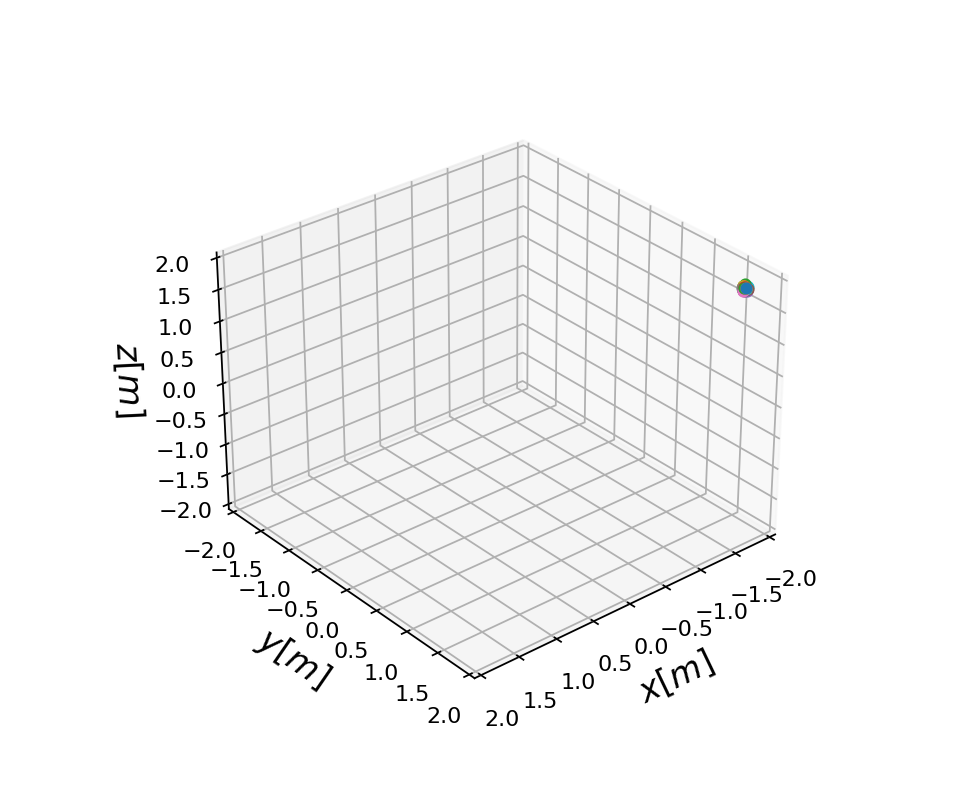

In [30]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1,1,1, projection='3d', elev=30, azim=50)

def init():
    ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)
    ax.set_zlim(-2,2)
    ax.set_xlabel(r'$x[m]$',fontsize=15)
    ax.set_ylabel(r'$y[m]$',fontsize=15)
    ax.set_zlabel(r'$z[m]$',fontsize=15)
    
# Definimos una funcion de actualizacion

def Update(i):
    plot = ax.clear()
    init()
    for particle in esferas_solidas:
        r=particle.GetRPositionVector()[i]
        x=r[0]
        y=r[1]
        z=r[2]
        plot = ax.scatter(x,y,z,marker='o')
    return plot

Animation = anim.FuncAnimation(fig,Update,frames=len(redt),init_func=init)

#  Simplectic Integrator Yoshida

Vamos a solucionar las ecuaciones de cinematica para un pendulo mediante el método de integración simpléctica por Yoshida de cuarto grado. Posteriormente a esta solución vamos a comparar el rendimiento de conservación de energía entre el metodo de segundo grado con el de Yoshida de cuarto orden.

# 
Implementación del codigo del método de Yoshida

In [22]:
def dv(x):
    return -x

def Yoshida(tiempo_inicial, tiempo_final, h, condicion_x_inicial, condicion_v_inicial):
    N = int((tiempo_final - tiempo_inicial)/ h)
    time = np.linspace(tiempo_inicial, tiempo_final, N)
    
    X = np.zeros(len(time))
    V = np.zeros(len(time))
    
    X[0] = condicion_x_inicial
    V[0] = condicion_v_inicial
    
    W_0 = -(np.cbrt(2))/(2- np.cbrt(3))
    W_1 = (1)/(2-np.cbrt(2))
    
    C = [W_1/2, (W_0+W_1)/2, (W_0+W_1)/2, W_1/2 ]
    D = [W_1, W_0, W_1]
    for i in range(1,len(time)):
        delta = time[i]-time[i-1]
        x_1 = X[i-1] + C[0]*V[i-1]*delta
        v_1 = V[i-1] + D[0]*dv(x_1)*delta
        
        x_2 = x_1 + C[1]*v_1*delta
        v_2 = v_1 + D[1]*dv(x_2)*delta
        
        x_3 = x_2 + C[2]*v_2*delta
        v_3 = v_2 + D[2]*dv(x_3)*delta

        x_4 = x_3 + C[3]*v_3*delta
        v_4 = v_3
        
        X[i] = x_4
        V[i] = v_4
    
    return X, V, time

In [23]:
a = Yoshida(0,10, 0.0001, 1, 0)
X = a[0]
V = a[1]
time = a[2]

In [24]:
Energia_potencial_elastica = []
for i in X:
    Energia_potencial_elastica.append((1/2)*i**2)
    
Energia_cinetica = []
for i in V:
    Energia_cinetica.append((1/2)*i**2)
    
Energia_mecanica = []
for i in range(len(Energia_cinetica)):
    Energia_mecanica.append(Energia_potencial_elastica[i]+Energia_cinetica[i])

# 
Implementación del codigo del método de solución de LeapFrog

In [25]:
tiempo_inicial = 0
tiempo_final = 10
N = 201
time_leapfrog = np.linspace(tiempo_inicial, tiempo_final, N)

condiciones_iniciales = np.array([1.0,0])

In [26]:
def dv(x):
    return -x

In [27]:
def LeapFrog(r0,t):
    
    N = len(t)
    h = t[1] - t[0]
    
    x = np.zeros(N)
    v = np.zeros(N)

    x[0] = r0[0]
    v[0] = r0[1] - 0.5*h*dv(x[0])
    
    for i in range(1,N):
        
        v[i] = v[i-1] + h*dv(x[i-1])
        x[i] = x[i-1] + h*v[i]
        
    X = np.array([])
    for i in range(len(x)-1):
        X = np.append(X,(x[i]+x[i+1])*0.5)

    V = v[1:]
    
    return X,V

In [28]:
x, v = LeapFrog(condiciones_iniciales,time_leapfrog)

Energia_potencial_leapfrog = []
for i in x:
    Energia_potencial_leapfrog.append((1/2)*i**2)
    
Energia_cinetica_leapfrog = []
for i in v:
    Energia_cinetica_leapfrog.append((1/2)*i**2)
    
Energia_mecanica_leapfrog = []
for i in range(len(Energia_potencial_leapfrog)):
    Energia_mecanica_leapfrog.append(Energia_potencial_leapfrog[i]+Energia_cinetica_leapfrog[i])
    

# 
Gráfica generada para hacer la comparación entre los dos métodos

<IPython.core.display.Javascript object>


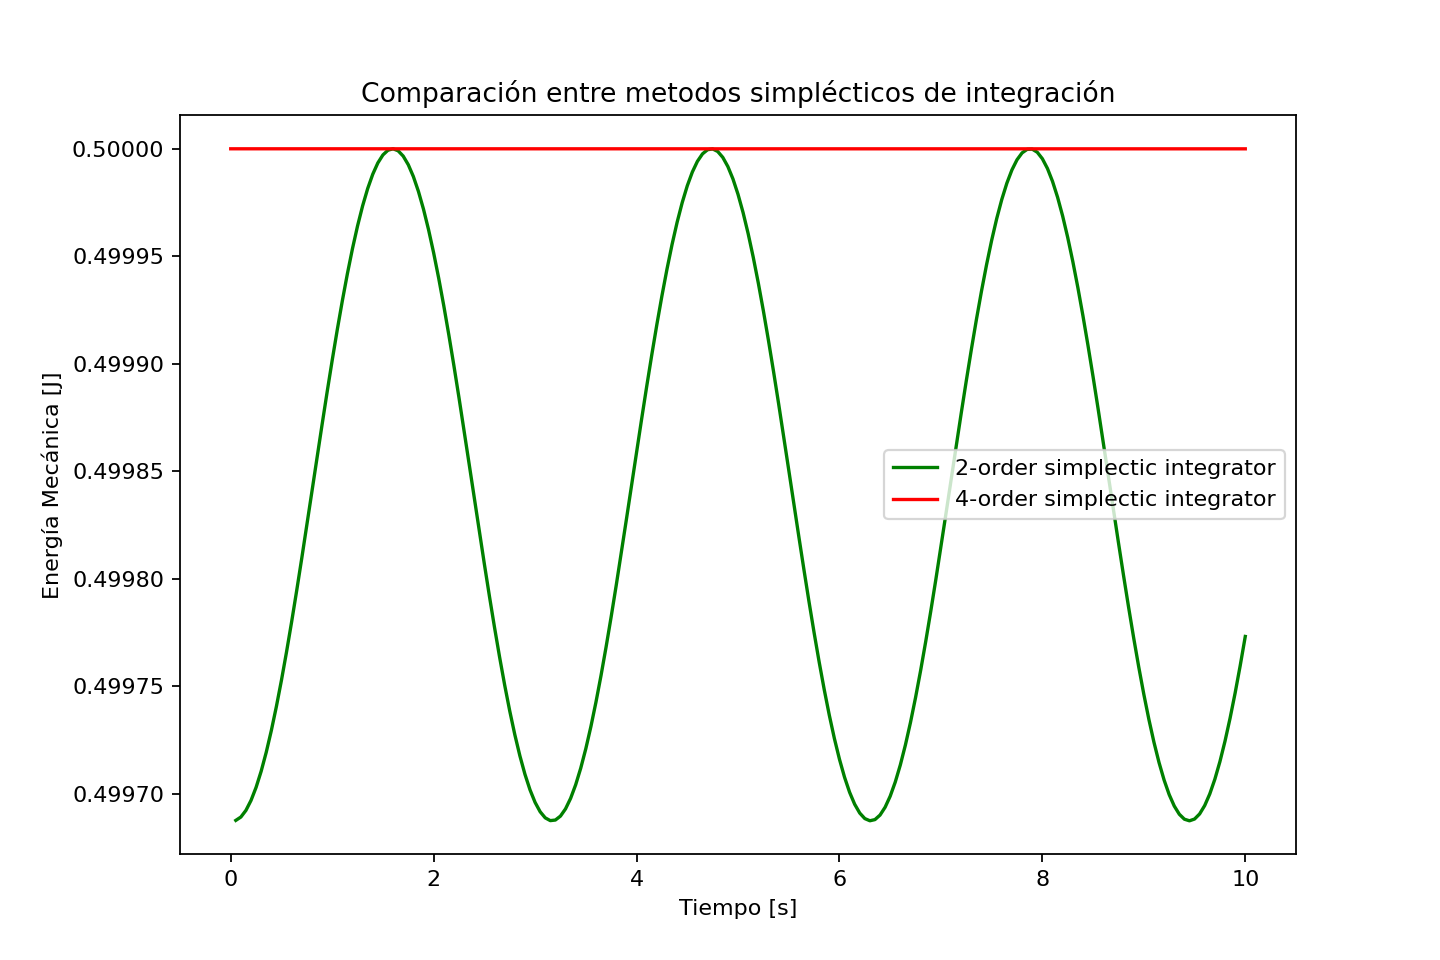

In [29]:
plt.figure(figsize = (9,6))
plt.title("Comparación entre metodos simplécticos de integración")
plt.xlabel("Tiempo [s]")
plt.ylabel("Energía Mecánica [J]")
plt.plot(time_leapfrog[1:], Energia_mecanica_leapfrog, label = '2-order simplectic integrator', color = "green")
plt.plot(time, Energia_mecanica, label = '4-order simplectic integrator', color = "red")
plt.legend()
plt.show()